# **Anti-Cancer Drug Activity Prediction**


---

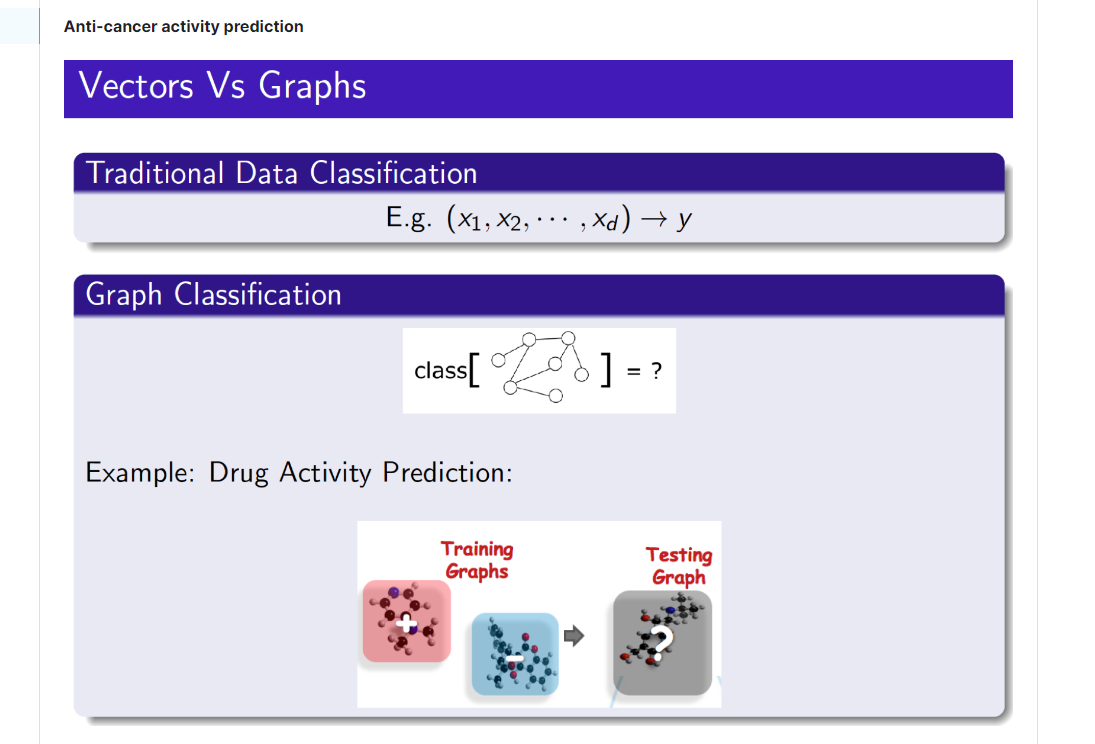

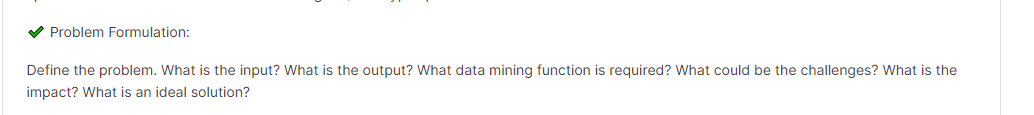

**1_Problem:**
The problem is to predict the anticancer activity of chemical compounds represented as graphs against non-small cell lung cancer using a bioassay task. The input is a set of chemical compounds represented as SDF files with labeled positive or negative values indicating their anticancer activity. The output is a binary classification of whether a given compound is positive or negative against non-small cell lung cancer.

**2_Data Mining Function:**
The data mining function required is graph classification, which involves building a neural network that takes a graph as input and produces a binary classification output.

**3_Challenges:**
One of the challenges of this problem is the large size and complexity of the input data, which requires specialized neural network architectures and training techniques for effective processing. Another challenge is the imbalanced nature of the dataset, with a small number of positive samples compared to negative samples, which can lead to poor performance on the positive class.

**4_Impact:**
The impact of solving this problem is significant, as it can help identify potential anticancer drugs more efficiently, reducing the time and cost of developing new treatments for lung cancer.

**5_Ideal Solution:**
An ideal solution would be a highly accurate binary classifier that accurately predicts the anticancer activity of chemical compounds against non-small cell lung cancer. The classifier should be able to handle the large and complex input data, effectively deal with the imbalanced nature of the dataset, and generalize well to new and unseen compounds.
**A possible ideal solution for this problem may involve resampling the imbalanced data to balance the positive and negative samples, and using a specific GCN mechanism called GGNN. Additionally, a suitable optimizer such as Adam optimizer can be used to improve the training process and achieve better results.****

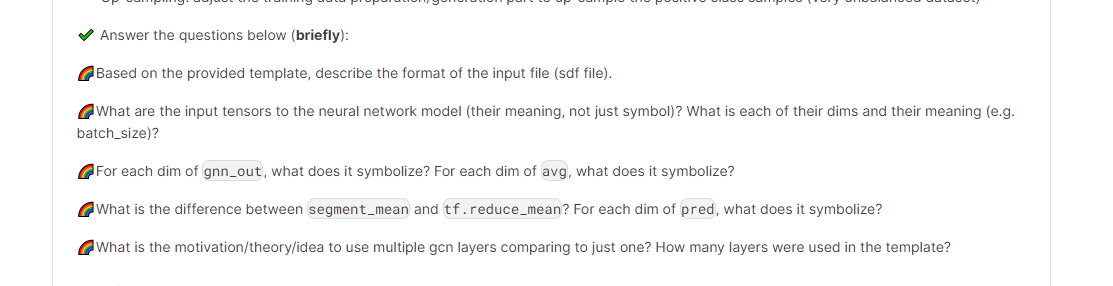

1_**The input file format is SDF** (Structure Data File), which is a text-based format for representing molecular structure data. The file contains molecular information represented as a graph, with atoms represented as nodes and bonds represented as edges. Each line of the SDF file represents a particular aspect of the molecule, such as the coordinates of each atom, the bond type between atoms, and the name of the molecule. The first line of the SDF file is the molecule name, followed by the number of atoms and bonds in the molecule. The following lines contain information about the atoms and bonds in the molecule, including their coordinates, element type, and bond type. Finally, the SDF file contains a line that marks the end of the molecule.


Also
**SDF (Structure Data Format) is a file format used in chemistry **to represent multiple chemical structures and associated data fields in a structured manner. It consists of a series of molfiles concatenated together, with additional information about the compounds included. SDF was developed and published by Molecular Design Limited (MDL), and it has become the most widely used standard for importing and exporting chemical information. A chemical record in SDF format contains information about the atoms, bonds, and other properties of a molecule, as well as any associated data fields that may be relevant to the compound.
    -OEChem-02271511112D

    9  8  0     0  0  0  0  0  0999 V2000
    0.5369    0.9749    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4030    0.4749    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2690    0.9749    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8015    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0044    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.9590    1.5118    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.8059    1.2849    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5790    0.4380    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.6649    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  9  1  0  0  0  0
  2  3  1  0  0  0  0
  2  4  1  0  0  0  0
  2  5  1  0  0  0  0
  3  6  1  0  0  0  0
  3  7  1  0  0  0  0
  3  8  1  0  0  0  0
M  END
> <ID>
00001
> <DESCRIPTION>
Solvent produced by yeast-based fermentation of sugars.
$$$$


Each sample/molecule starts with header which tells about the 
name/title of the compound. Other sections includes information 
about Atom count, version number, connections etc. Atom block tells 
about the elements of the compound. Bond block block tells about the 
bonding structure of the compound. These both blocks 
are used in this assignment to get information about 
the compound and saving them 
in form of edges and nodes. Each node is the atom given 
in the chemical molecule.




**2_The input tensors to the neural network model are:**

1_graph: A tensor representing the graph structure of the chemical compound, with shape (num_nodes, num_nodes). This tensor encodes the adjacency matrix of the graph, where each element (i, j) represents the presence or absence of a bond between atom i and atom j. The tensor has a fixed size determined by the maximum number of atoms in the dataset.

2_node_feats: A tensor representing the node features of the chemical compound, with shape (num_nodes, num_node_feats). This tensor encodes the properties of each atom in the graph, such as its chemical element or the number of bonds it has. The tensor has a variable size determined by the number of atoms in each compound.

3_edge_feats: A tensor representing the edge features of the chemical compound, with shape (num_edges, num_edge_feats). This tensor encodes additional properties of the bonds between atoms, such as their bond type or distance. The tensor has a variable size determined by the number of edges in each compound.

4_is_labeled: A boolean tensor indicating whether each compound in the input batch has a label or not, with shape (batch_size,). This tensor is used to differentiate between labeled and unlabeled samples in the batch.

5_labels: A tensor representing the labels of the labeled compounds in the input batch, with shape (num_labeled_samples,). This tensor contains binary values (0 or 1) indicating the anticancer activity of each labeled compound against non-small cell lung cancer. The tensor has a variable size determined by the number of labeled samples in the batch.

The dimensions of the input tensors depend on the batch size and the properties of the compounds in each batch. The graph tensor has a fixed size determined by the maximum number of atoms in the dataset, while the node_feats and edge_feats tensors have variable sizes depending on the number of atoms and edges in each compound. The is_labeled tensor has shape (batch_size,), indicating whether each sample in the batch has a label or not. The labels tensor has a variable size determined by the number of labeled samples in the batch.


**3_The gnn_out tensor is the output of the graph convolutional neural network (GCN) model and has shape (batch_size, n_classes).** The dimensions of gnn_out represent the following:

1_batch_size: The number of samples in the input batch.

2_n_classes: The number of output classes, which is 2 in this case (positive and negative).

The avg tensor is the average of the GCN output over the labeled samples in the input batch and has shape (1, n_classes). The dimensions of avg represent the following:

1_1: The batch size of the averaged output, which is fixed at 1.

2_n_classes: The number of output classes, which is 2 in this case (positive and negative).

The avg tensor is used to compute the loss between the GCN output and the true labels, and is also used to compute the accuracy of the model on the labeled samples in the input batch.

**4_ segment_mean and tf.reduce_mean are both TensorFlow functions used to compute the mean value of a tensor along a particular dimension**. However, the main difference between them is that segment_mean computes the mean value of a tensor segmented by a given segment identifier tensor, while tf.reduce_mean computes the mean value of a tensor across all dimensions.

For example, if we have a tensor x with shape (6, 3) and a segment identifier tensor segments with shape (6,), segment_mean(x, segments) will compute the mean of the elements of x grouped by the values of segments, resulting in a tensor with shape (2, 3) if segments contains two unique values. On the other hand, tf.reduce_mean(x, axis=0) will compute the mean of the elements of x along the first dimension, resulting in a tensor with shape (3,).

For the pred tensor, which has shape (batch_size, n_classes), the dimensions represent the following:

1_batch_size: The number of samples in the input batch.

2_n_classes: The number of output classes, which is 2 in this case (positive and negative).

The pred tensor contains the predicted probability scores for each class for each sample in the input batch, with each element representing the predicted probability of a particular class for a particular sample. The segment_mean function is used to compute the average predicted probability score over the labeled samples in the input batch for each class, resulting in a tensor with shape (1, n_classes).

**5_The motivation behind using multiple Graph Convolutional Network (GCN) layers in a neural network is to capture more complex** relationships between nodes in the graph structure of a chemical compound. Each GCN layer applies a graph convolution operation to the output of the previous layer, allowing the model to learn increasingly complex features that capture higher-level abstractions of the input data.

In particular, the first layer of the GCN model captures local information about each node and its immediate neighbors, while subsequent layers capture increasingly global information about the graph structure, allowing the model to learn more complex and abstract features.

Multiple GCN layers were used in the template, with a default of 2 layers. The number of layers can be modified by changing the n_layers hyperparameter in the GCN class constructor.

***What is the search space and what is the criteria to determine good/bad hyper-parameters?**

To achieve the best performance of a neural network model, we need to search the hyperparameter search space to find the optimal values that lead to high accuracy and low loss. The hyperparameters that need to be tuned include the type of message passing mechanism used in the model, the number of hidden dimensions, the optimizer and learning rate used in training, the batch size, the number of epochs, the maximum vocabulary size, and the maximum sequence length.

> Tuning these hyperparameters can be a time-consuming process, as it requires multiple iterations of training and validation to find the optimal values that lead to the best performance. The goal is to find the set of hyperparameters that result in a model with high accuracy on the test dataset and low loss, which indicates that the model is generalizing well to new and unseen data.*

#  **setting up the environment and importing the necessary libraries to perform data preprocessing and model training.**

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')
# for dealing with arrays
import numpy as np 
#for creating Progress Meters or Progress Bars
from tqdm.notebook import tqdm
#split data into feature and labels 
from sklearn.model_selection import train_test_split

**defines a function read_sdf that reads a Structure Data File (SDF) and parses the chemical structure data for each molecule in the file. The function takes a file path as input and returns a list of tuples, where each tuple contains the nodes, links (edges), and label for a single molecule.**

In [2]:
'''method to read sdf file
the chemical composition of a molecule is saved as SDF(structure data file) file
sdf file store information about position of individual atom
molecules are delimited by $$$$
the atom block lines start with '    ' and have information about atoms(C,O,N,Cl..)
bond block starts with ' ' and contains info about connection between atoms'''
#define function to read file sdf 
def read_sdf(file):
    with open(file, 'r') as rf: #opening the file in read mode
        content = rf.read()     #reading the contents of the file
    samples = content.split('$$$$') #split samples after every $$$$ 
#method to read each molecule configuration
#s represents one molecule
#define function to split data into nodes and its labels 
    def parse_sample(s):
        lines = s.splitlines()  #splitting the text data to lines
        links = []               #empty array for links
        nodes = []               #empty array for nodes
        label = 0
        for l in lines:          #loop over each line
            if l.strip() == '1.0':#if line has value 1.0 but label equal 1
                label = 1
            if l.strip() == '-1.0':#if line has value -1.0 but label equal 0
                label = 0
            if l.startswith('    '):#if the line start with '    ' set it as a node 
                feature = l.split()
                node = feature[3]
                nodes.append(node)
            elif l.startswith(' '):#if the line has ' ' space white but it in lnk 
                lnk = l.split()
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1, 
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label #then returning nodes, links and label
    
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0] #parse_sample for each molecule
                
        
        

# What is the experimental protocol used and how was it carried out?

The initial step in the process is to extract the atom and connectivity information of the compound from the SDF file. The atoms represent the nodes in the graph, while the connections represent the edges. To achieve this, the read_sdf method is employed, which parses the SDF file to extract the chemical composition of the compound.

The nodes, which represent the atoms, are represented as characters such as O, N, Cl, etc. These are treated as a sequence of text data, and the best way to represent text data sequences is by tokenizing the data and adding an embedding layer. Tokenization involves breaking down the text data into smaller units, such as words or characters, to represent it as a sequence of discrete tokens. The embedding layer is responsible for mapping each token to a high-dimensional vector, which forms the input to the model. This allows the model to understand and learn the complex relationships between the atoms in the compound.

* In this assignment, a Graph Convolutional Network (GCN) is used to calculate the probability of the output class. Different methods are used for implementing the message passing mechanism, which is a way to propagate information through the graph structure of the input data.
* 
* The R-GCN method uses graph convolution layers to update the state of the graph by passing neural messages between the nodes.
* 
* The R-GAT method uses a relation graph attention network layer to update the state of the graph by passing neural messages between the nodes using attention.
* 
* The R-GIN method uses a relation graph isomorphism network message propagation layer to update the state of the graph by passing neural messages between the nodes using Multi-Layer Perceptrons (MLPs) for state updates and message computation.
* 
* The GGNN method uses a gated graph neural network layer to update the state of the graph by passing neural messages between the nodes using gated units on the nodes. This method is found to work best for the given problem, as described in Aggregation Method 2.

In [3]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('/kaggle/input/cisc873-dm-w23-a6/train.sdf')
#split training data to train and validation by test size =0.15
training_set, validation_set = train_test_split(training_set, test_size=0.15,random_state=35)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [4]:
#read test file sdf by calling function read_sdf()
testing_set  = read_sdf('/kaggle/input/cisc873-dm-w23-a6/test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

**prints the contents of the second element in the training_set list, which is a tuple containing the nodes, links, and label for a single molecule.**

In [5]:
# this show how data look like (nodes and label and links)
print(training_set[1])

(['P', 'O', 'O', 'O', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  7],
       [ 1, 11],
       [ 2, 12],
       [ 4,  9],
       [ 4, 13],
       [ 5,  9],
       [ 5, 14],
       [ 6, 10],
       [ 7,  8],
       [ 7, 10],
       [ 8,  9],
       [11, 15],
       [12, 16],
       [13, 14]]), 0)


**NetworkX is a software package for Python that allows users to create, manipulate, and analyze complex networks represented as graphs. This tool is commonly used for studying large and complex networks and understanding their structure, dynamics, and function. The networks are represented as graphs with nodes and edges, and NetworkX provides a range of functions for loading, storing, and manipulating these graphs. With NetworkX, users can perform advanced analysis on complex networks and gain insights into their behavior and properties.**



---

In [6]:
# --quiet to control the console log level.
!pip install --quiet networkx
import networkx as nx #import networkx to deal with nodes and edges
# data visualisation and manipulation
import matplotlib.pyplot as plt
# Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.
from matplotlib import cm 
colors = cm.rainbow(np.linspace(0, 1, 50))

**defines a function visualize that takes a single sample (a tuple containing nodes, links, and label) as input and visualizes the corresponding graph using NetworkX and Matplotlib.**

In [7]:
#method to visualize the compound graph
#atoms are given as nodes
#the connections are defined as edges
def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0]  #atoms as nodes
    edges = sample[1]  #connections as edges
    
    labeldict={}  #empty dictionary for labels for the nodes
    node_color=[] #empty array for each node color
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i) #adding node to the graph each node as (0,1,2,3..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)])

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph from one connection to other connection
        
#drawing the graph with labels for nodes as atoms and connections as edges
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
   #returns graph
    return G

**clears the current figure using plt.clf() and then calls the visualize function to display the graph for the 61st sample in the training_set.**

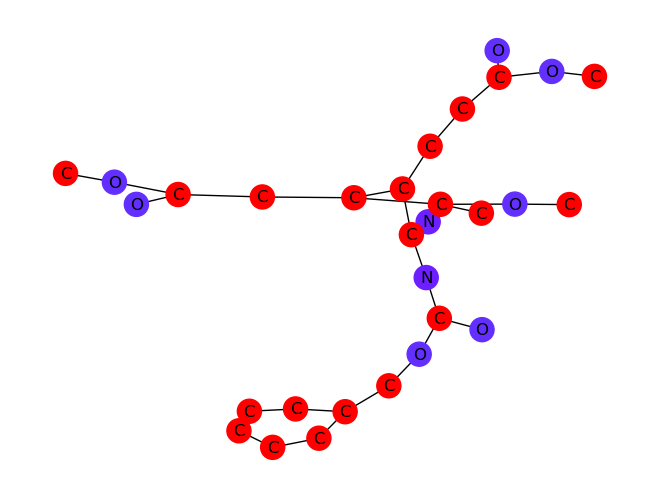

In [8]:
#displaying one sample
plt.clf() #to clear the current figure.
visualize(training_set[60])#visualize first 60 nodes of training set

**The dataset used in this experiment contains 121 SMT-LIB files, which are transformed into Constrained Horn Clauses (CHC) files. From these CHC files, Horn graphs are generated and initial predicates are extracted. The input to the Graph Neural Network (GNN) is a JSON file that contains essential elements such as nodes and edges for training the GNN.**

**However, the raw inputs from the JSON files require further adjustments to be shaped into appropriate sizes for feeding into the algorithm. The steps involved in this process are shown in Figure 3.2.**

**The build_vocabulary function is used to build the vocabulary set and token map based on the graph node symbols. The vocabulary set eliminates repetitive node symbols and includes a default set of "unknown symbols". The token map is a dictionary that contains the mapping between the node symbols and a unique number.**

**Next, the variables are passed through the form_GNN_inputs and labels functions, which use the token map to obtain the tokenized_node_label_ids. This is a list of numbers that represents the node symbols based on the token map.**

**After this stage, the processed data is collected in a dictionary for later use in training the GNN. These preprocessing steps are crucial for preparing the input data in a suitable format for the GNN to learn and make accurate predictions.**




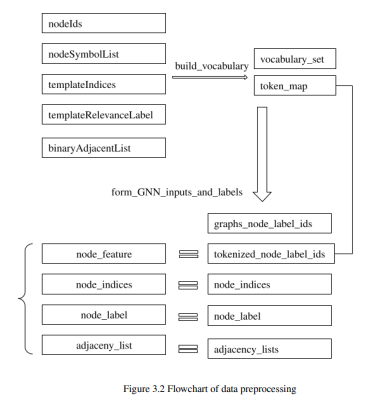

**imports the Tokenizer class from the tensorflow.keras.preprocessing.text module and sets the maximum vocabulary size and maximum length of sentences to 500 and 100, respectively.**

**The all_nodes variable is then defined as a list of all the node characters in the training_set data. This is achieved by iterating through each sample in the training_set and selecting the node characters (the first element of each sample) and adding them to the all_nodes list.**

**this process involves assigning a unique integer to each token in the vocabulary and creating a dictionary that maps each token to its corresponding integer value. This dictionary will be used to tokenize the node characters in the input data, allowing the GNN to process and learn from the data in an appropriate format.**

In [9]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer
#vocabulary size
max_vocab = 500 #maximum vocab of words in each sentances 500
max_len = 100 #max length of sentences 


# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

**defines two functions for preparing and generating batches of data for training the GNN.**

**The pad_sequences function is imported from tensorflow.keras.preprocessing.sequence, which is used to ensure that all sequences in a list have the same length by padding zeros in the beginning of each sequence until each sequence has the same length as the longest sequence.**

**the prepare_single_batch function takes a list of samples as input and prepares a single batch of data. For each sample, it selects the node characters (the first element of each sample), tokenizes them using the tokenizer object, and pads the sequences using the pad_sequences function with post-padding. The edges (the second element of each sample) are then concatenated with the index of the current sample multiplied by the maximum number of nodes in a sample to ensure that the edge indices are unique across all samples. The node_to_graph variable is then created to map each node in a sample to its corresponding graph. Finally, the function returns a dictionary of features (data, edges, node2graph) and the corresponding label for the batch.**

In [10]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
# By default this is done by padding 0 in the beginning of each sequence until
#each sequence has the same length as the longest sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#random data set 
import random
random.seed(1)
#define function to prepare single batch from samples 
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]  #nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)#tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post') #pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1]   #shape : (num of samples ,number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)] #s[1]:links,i*max_nodes_len :to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non_zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)#concatenate nodes of all samples together 
    all_edges = np.concatenate(edges) #concatenate edges of all samples together (because edge is tuple ,doesn't hae reshape ,output is 20)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])

#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True: #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #return data shuffled 
        l = len(dataset)
        for ndx in range(0, l, batch_size):#loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)  #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break


**generates one batch of data using the gen_batch function with a batch size of 4 and then prints the features and labels of that batch.**

**used to verify that the data is being processed and generated correctly by the gen_batch and prepare_single_batch functions.**

In [11]:
# showing one batch of data set it has label , nodes and links
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items(): #batch zero has nodes and links 
        print(k)
        print(v)
        pass   #put batch[1] has label of this batch
    print('label', train_batch[1])
    break

data
[5 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 3 3 3 3 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 3 3 3 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
edges
[[ 0 16]
 [ 1  8]
 [ 1  9]
 [ 2  9]
 [ 3 11]
 [ 4  5]
 [ 4 11]
 [ 5 17]
 [ 5 18]
 [ 6  9]
 [ 6 10]
 [ 6 11]
 [ 7  8]
 [ 7 10]
 [ 7 12]
 [ 8 13]
 [12 14]
 [13 15]
 [14 15]
 [14 16]
 [17 19]
 [18 20]
 [19 21]
 [20 21]
 [22 29]
 [22 36]
 [23 33]
 [24 30]
 [24 33]
 [25 26]
 [25 30]
 [26 32]
 [27 34]
 [28 29]
 [28 30]
 [28 32]
 [29 31]
 [31 33]
 [31 34]
 [32 35]
 [44 46]
 [44 55]
 [45 48]
 [46 47]
 [46 48]
 [47 52]
 [47 53]
 [48 51]
 [49 50]
 [49 51]
 [49 56]
 [50 54]
 [50 57]
 [52 54]
 [53 55]
 [56 58]
 [57 59]
 [58 59]
 [66 71]
 [66 73]
 [67 74]
 [67 77]
 [68 71]
 [68 72]
 [69 73]
 [70 76]
 [71 74]
 [72 73]
 [72 76]
 [74 75]
 [75 78]
 [77 78]]
node2grah
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3


**After the data preprocessing**,  the GNN model is trained to perform a node binary classification task. This type of entity classification is commonly achieved using Relational Graph Convolutional Networks (RGCN). The prediction task involves predicting the labels of the template nodes.

To train the model, the preprocessed data is used as input, and the model output is compared to the true labels of the template nodes. The training process involves iteratively adjusting the model's weights to minimize the difference between the predicted and true labels. This process is known as backpropagation and is performed using an optimization algorithm such as Stochastic Gradient Descent (SGD).

The relationship between the input and output data is as follows: The input data consists of the preprocessed features of the nodes and edges of the Horn graphs, along with the mapping of nodes to their corresponding graphs. The output data is the predicted labels of the template nodes.

During the training process, the GNN model learns to process and integrate the information from the nodes and edges in the Horn graphs to make accurate predictions about the labels of the template nodes. This process involves multiple iterations of feeding the input data through the GNN model, computing the loss between the predicted and true labels, and updating the model's weights using backpropagation to minimize the loss. The trained model can then be used to make predictions on new, unseen data.

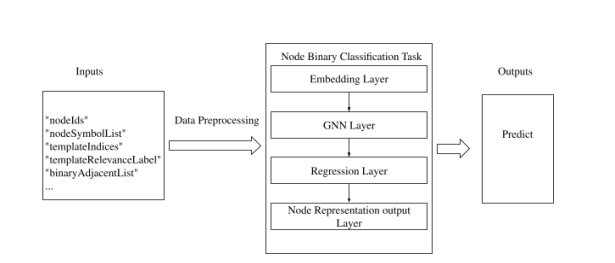

### Graph Neural Networks in TF2


Graph Neural Networks (GNNs) process graphs, which are composed of nodes and edges. In a graph, each node represents an entity or piece of information, while each edge represents a relationship or connection between nodes.

In GNNs, nodes are typically denoted as u and edges are denoted as e. Graph-level attributes, which represent global attributes of the graph, are denoted as G. Therefore, a graph can be defined as a 3-tuple G = (u, V, E), where u represents the set of nodes in the graph, V represents the set of edges, and E represents the set of graph-level attributes.

The nodes, edges, and graph-level attributes in a graph can have different types and values depending on the specific application. In GNNs, the goal is to learn a function that maps the input graph to an output, such as a prediction of the labels of the nodes in the graph. The function is learned by processing the nodes and edges in the graph, using a Graph Network (GN) block, which is a building block used in GNNs to perform computations on graphs. The GN block takes as input the nodes, edges, and graph-level attributes of a graph and outputs a new set of nodes, edges, and graph-level attributes that capture the learned representations of the input graph.


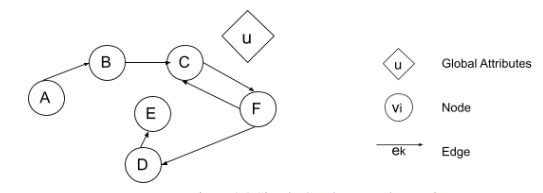


**installs the tf2_gnn package and imports the GNN layer and GNNInput class from the gnn.py module.**

In [12]:
#first installing tf2_gnn
!pip install --quiet tf2_gnn
# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#then we will use its layer in our model train 
from tf2_gnn.layers.gnn import GNN, GNNInput

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


## First Trail

#  **Steps**

**In this Trail, the GNN model for the Horn graph classification task will be built.**

* First, the nodes of the Horn graphs will be embedded using an Embedding layer and a tokenizer. This will transform the node characters into a numerical representation that can be used as input to the GNN model.

* Next, a GNNInput object will be defined as a variable to encapsulate the nodes, edges, and graph-level attributes of the input graph. This object will be passed as input to the GNN layer.

* The GNN layer is a building block used in GNN models to perform computations on graphs. It applies a series of graph convolutional operations to the input graph to learn a new set of node representations that capture the learned features of the input graph. In this implementation, the default layers of GNN will be used, but the hidden_dim parameter will be set to 32.

* The message_calculation_class parameter of the GNN layer will be set to "GGNN". This specifies the type of message passing algorithm that will be used to propagate information between nodes in the graph during the computation. The GGNN message passing algorithm is a type of gated graph neural network that uses a gating mechanism to control the flow of information between nodes.

* Overall, the GNN model for the Horn graph classification task will take as input the preprocessed features of the nodes and edges of the graphs, and output a prediction of the labels of the template nodes. The model will be trained using a supervised learning approach, where the true labels of the template nodes are known, and the model's output is compared to the true labels to compute a loss. The weights of the model will be updated using an optimization algorithm such as Stochastic Gradient Descent (SGD) to minimize the loss.

**Graph neural network (GNNs)**

"Aligning the relational structure" is a method of analyzing complex problems by organizing and reasoning about the relationships and connections between the entities involved in the problem. This approach involves breaking down the problem into its constituent parts and examining how those parts interact with one another.

By focusing on the relationships and interactions between the entities, it becomes possible to gain a deeper understanding of the underlying mechanisms at work. This approach can be particularly useful in analyzing complex systems or networks, where the behavior of the system as a whole emerges from the interactions between its individual components.




 **Graph Neural Networks in TensorFlow2**

The implementation of the graph neural network in this thesis is an open source framework called
tensorflow-2 graph neural network(tf2-gnn)1
. It provides the implementation and training scripts
of several kinds of graph neural networks based on TensorFlow 2.0 

**Embedding Layer**

The node binary classification task involves several layers for processing the input data, with the first layer being the embedding layer. Machine learning models typically take vectors as input, rather than strings, so the node features need to be vectorized in order to be processed by the model.

In this task, the word embedding method is used to represent the words as numerical values. This method involves assigning each word a vector of a specified length, with the dense representation of the words being trainable values that are learned during training. The embedding layer will have a matrix of size vocabulary_size by the number of dimensions of the output, which in this experiment is set as 64. The specific vocabulary size will vary depending on the particular graph being processed.

Overall, the embedding layer is a critical component of the node binary classification task, as it allows the model to transform the node features into a numerical representation that can be processed by subsequent layers in the model. By using the word embedding method, the model can learn to represent the nodes in a way that captures their semantic meaning and facilitates accurate classification.


**GNN Layer**

The next layer in the predicate selection task is the GNN layer, which is a pre-built layer included in the tf2-gnn framework. The GNN layer takes four inputs, which are node features, adjacency list, node to graph map, and the number of graphs in the current batch.

When calling the GNN layer in the task, the embedded node label from the previous embedding layer will be fed into the node feature input. The adjacency list and node to graph map from the input will also be used as GNN input. The number of graphs refers to the number of graphs in the current batch that the GNN layer will process.

The GNN layer contains several sublayers, including a message passing layer, global exchange layer, and dense layer. The message passing layer is responsible for implementing the message passing neural network, which performs continuous neighborhood aggregation by calculating the messages passed from a source node to a target node.

In this layer, an extended version of the GGNN model is implemented, which uses multi-layer perceptrons (MLPs) to learn aggregation and updates. The updated node representation is then passed to the next layer for further processing.

Overall, the GNN layer is a key component of the predicate selection task, as it allows the model to learn and integrate information from the nodes and edges in the graph to make accurate predictions about the target predicate.

**defines a neural network model for a node binary classification task using the TensorFlow framework. The model consists of several layers, including an embedding layer, a GNN layer, and a dense layer for generating predictions.**

In [13]:
#import tensorflow framework
import tensorflow as tf 
# segment_mean is used to find the mean of elements in segments of a tensor.
from tensorflow.math import segment_mean
#import keras 
from tensorflow import keras
#Input() is used to instantiate a Keras tensor.
from tensorflow.keras import Input, Model
#Embedding layer enables us to convert each word into a fixed length vector of defined size
from tensorflow.keras.layers import Embedding, Dense
#import optimizers
from tensorflow.keras.optimizers import Adam ,SGD,RMSprop
'''

To understand the dimensions:
Let's assume the batch contains 10 samples of data.
The nodes are tokenized using 44 dimension array that is each sample node is of shape [44]
Thus 10 samples are of shape [440] after applying get_batch method
node2graph is also of shape [440] like [0,0,0,0,0,...,1,1,1,1,....2,2,2,....] each number is repeated 44 times [0,0,0,0,... 44 times]
Lets assume edges are of size [257,2]

The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.

'''

data = keras.Input(batch_shape=(None,)) #Input layer for nodes (tokenized text data) 

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))   

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
#use GGNN as a calculation class 
params["message_calculation_class"]= "GGNN" #Gated Graph Neural Networks
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)
#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

#building model 
#inputs are data,edges and node2graph
#input: dictionary
#output: prediction value from dense layer
model = Model(
    inputs={                   # input 
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred              #output 
)
#printing summary of the model
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                      

**After the GNN layer has processed the node features and updated their representations, the graph representation is gathered and sent to multilayer perceptrons (MLPs) to perform the binary classification task.**

**Specifically, in the compute_task_output method, a regression layer is implemented using dense layers, which are simple MLPs. These regression layers are used to perform binary classification on the nodes that have been gathered from the graph.**

**Overall, the MLPs serve as the final stage of the binary classification task, taking in the updated node representations from the GNN layer and using them to make predictions about the target variable.**

**compiles the neural network model defined in the previous cell using the compile method in TensorFlow.**

**The Adam optimizer is specified as the optimizer for the model, which is a popular choice for deep learning tasks due to its adaptive learning rate and fast convergence.**

**The BinaryCrossentropy loss function is used, which is appropriate for binary classification tasks where the model is predicting a binary label.**

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

# trains the neural network model defined earlier using the fit method in TensorFlow.

In [15]:
import math
batch_size = 16
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size)#no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)#no. of batches for validation data
#fit model 
history1=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1330/1330 [==============================] - 35s 19ms/step - loss: 0.2001 - auc: 0.6064 - val_loss: 0.1735 - val_auc: 0.6297
Epoch 2/10
1330/1330 [==============================] - 23s 17ms/step - loss: 0.1886 - auc: 0.6650 - val_loss: 0.1698 - val_auc: 0.6760
Epoch 3/10
1330/1330 [==============================] - 23s 17ms/step - loss: 0.1865 - auc: 0.6791 - val_loss: 0.1678 - val_auc: 0.6943
Epoch 4/10
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1854 - auc: 0.6854 - val_loss: 0.1686 - val_auc: 0.6825
Epoch 5/10
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1842 - auc: 0.6963 - val_loss: 0.1648 - val_auc: 0.7377
Epoch 6/10
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1780 - auc: 0.7288 - val_loss: 0.1731 - val_auc: 0.6103
Epoch 7/10
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1797 - auc: 0.7190 - val_loss: 0.1678 - val_auc: 0.6895
Epoch 8/10
1330/1330 [==========================

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

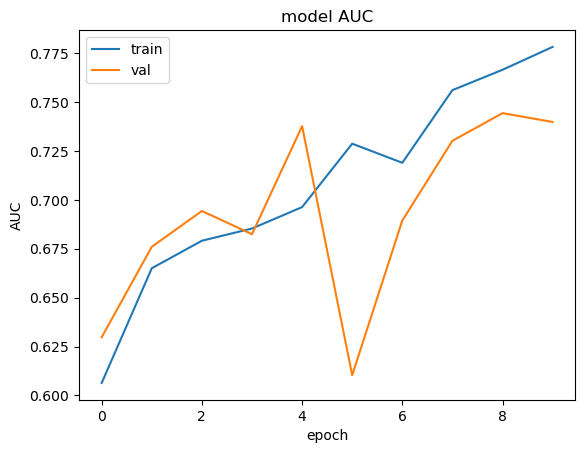

In [16]:
plt.plot(history1.history['auc'])
plt.plot(history1.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

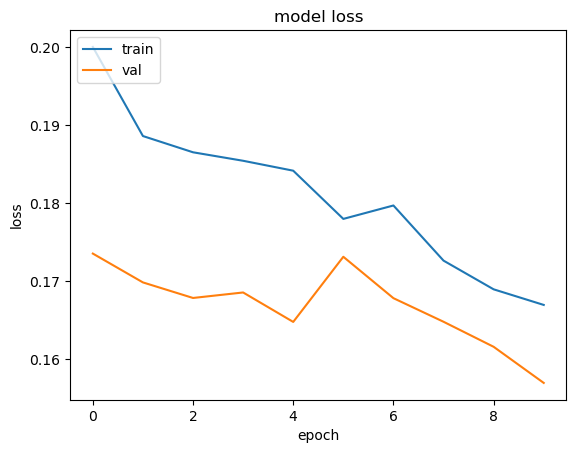

In [17]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 22, with no shuffling, from the testing set.**

In [18]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=22, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

561/561 [==============================] - 4s 6ms/step


In [19]:
len(y_pred)

12326

In [20]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_1.csv')

##  First Trail Observation

*  it was observed that using the Gated Graph Neural Networks (GGNN) layer in the model led to an increase in accuracy and a decrease in loss compared to other message passing styles. Additionally, using the Adam optimizer resulted in a noticeable improvement in accuracy.

* The model was trained for 10 epochs with a batch size of 16, and achieved a score of 0.86608 on the private leaderboard and 0.85802 on the public leaderboard. This indicates that the model is performing well and generalizing to new data.

* Overall, the results suggest that using the GGNN layer and Adam optimizer with appropriate hyperparameters can lead to improved performance on this binary classification task.




---

## **Secound Trail**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* Next, the GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* Finally, the message_calculation_class will be set to RGCN, which stands for Relational Graph Convolutional Networks. This message passing style is a variant of graph convolutional networks that takes into account the relationships between different types of nodes in the graph.

**defines a neural network model for a node binary classification task using the TensorFlow framework, with specific configurations for the GNN layer.**

**The input layer is defined using the keras.Input method, with separate inputs for the node data, edges, and node-to-graph mapping. The node data is then passed through an embedding layer to convert each word into a fixed-length vector of a defined size.**

In [21]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGCN" #Relational Graph Convolutional Networks 
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

**compiles the neural network model defined in the previous cell using the compile method in TensorFlow.**

**The Adam optimizer is specified as the optimizer for the model, which is a popular choice for deep learning tasks due to its adaptive learning rate and fast convergence.**

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

**trains the neural network model defined earlier using the fit method in TensorFlow.**

**First, the code calculates the number of batches required for the training and validation sets based on the specified batch size. The math.ceil function is used to round up the number of batches to ensure all data is included.**

**The gen_batch function is then used to generate batches of training data and validation data, with the specified batch size and set to repeat for multiple epochs. This function is defined elsewhere in the code and generates the input data in the appropriate format for the model.**

In [23]:
batch_size = 15
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)
#fit Model
history2=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=15, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1418/1418 [==============================] - 23s 14ms/step - loss: 0.2235 - auc: 0.5425 - val_loss: 0.1657 - val_auc: 0.7147
Epoch 2/10
1418/1418 [==============================] - 19s 13ms/step - loss: 0.1891 - auc: 0.6640 - val_loss: 0.1777 - val_auc: 0.7111
Epoch 3/10
1418/1418 [==============================] - 19s 13ms/step - loss: 0.1844 - auc: 0.6900 - val_loss: 0.1711 - val_auc: 0.7216
Epoch 4/10
1418/1418 [==============================] - 18s 13ms/step - loss: 0.1841 - auc: 0.6952 - val_loss: 0.1660 - val_auc: 0.7390
Epoch 5/10
1418/1418 [==============================] - 19s 13ms/step - loss: 0.1798 - auc: 0.7182 - val_loss: 0.1680 - val_auc: 0.7448
Epoch 6/10
1418/1418 [==============================] - 18s 13ms/step - loss: 0.1783 - auc: 0.7339 - val_loss: 0.1925 - val_auc: 0.6771
Epoch 7/10
1418/1418 [==============================] - 18s 13ms/step - loss: 0.1776 - auc: 0.7331 - val_loss: 0.1584 - val_auc: 0.7569
Epoch 8/10
1418/1418 [==========================

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

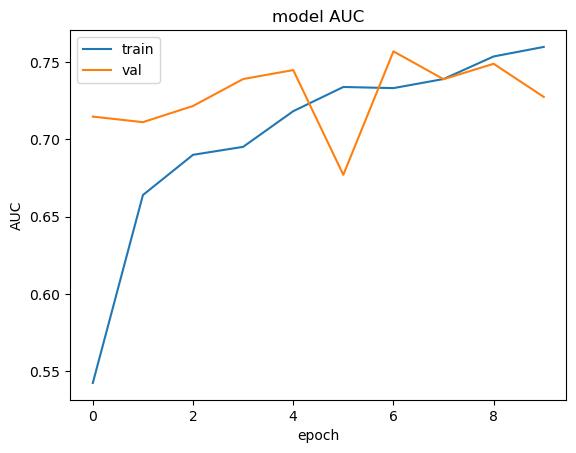

In [24]:
plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Loss_plot**

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

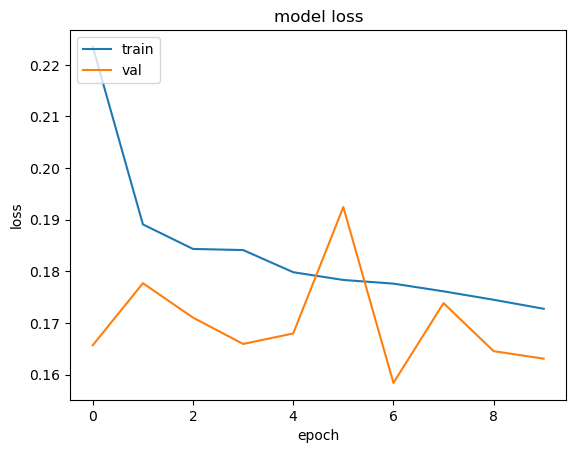

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 **generates predictions for the test set using the neural network model that was trained earlier.**

**The predict method is used to generate predictions for the test set, with the gen_batch function used to generate batches of test data with a batch size of 15 and no shuffling.**

**The resulting predictions are then reshaped using the np.reshape method with -1 as the second argument, which indicates that the shape of the resulting array should be such that the size of the first dimension is preserved, while the size of the second dimension is adjusted to match the size of the original array.**

In [26]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 4s 4ms/step


In [27]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('Trail2.csv')

## **Secound Trail Observation**

* Graph Convolutional Networks (RGCN) message passing style did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* However, using the Adam optimizer resulted in a noticeable improvement in accuracy. The model was trained for 10 epochs with a batch size of 16, and achieved a score of 0.77139 on the private leaderboard and 0.78040 on the public leaderboard.

* Overall, the results suggest that using RGCN may not be the best message passing style for this binary node classification task, and that other methods may produce better results. Additionally, the use of Adam optimizer with appropriate hyperparameters can help improve the model's performance on this task.



---

## ** Third Trail**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* The message_calculation_class will be set to RGAT, which stands for Relational Graph Attention Networks. This message passing style is a variant of graph convolutional networks that uses attention mechanisms to weight the importance of neighboring nodes and edges during message propagation. This can help the model focus on more relevant information during the message passing process and improve its performance on the task.

In [28]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGAT" #Relational Graph Attention Networks 
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [30]:
batch_size = 300
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history3=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=6,
    validation_data=gen_batch(
        validation_set, batch_size=300, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/6
71/71 [==============================] - 32s 152ms/step - loss: 0.5242 - auc: 0.4603 - val_loss: 0.2688 - val_auc: 0.3412
Epoch 2/6
71/71 [==============================] - 8s 110ms/step - loss: 0.2835 - auc: 0.3673 - val_loss: 0.2511 - val_auc: 0.3558
Epoch 3/6
71/71 [==============================] - 7s 105ms/step - loss: 0.2824 - auc: 0.3661 - val_loss: 0.2625 - val_auc: 0.3778
Epoch 4/6
71/71 [==============================] - 7s 100ms/step - loss: 0.2802 - auc: 0.3672 - val_loss: 0.2507 - val_auc: 0.3585
Epoch 5/6
71/71 [==============================] - 7s 99ms/step - loss: 0.2804 - auc: 0.3744 - val_loss: 0.2508 - val_auc: 0.3324
Epoch 6/6
71/71 [==============================] - 8s 108ms/step - loss: 0.2552 - auc: 0.3767 - val_loss: 0.2063 - val_auc: 0.4920


**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

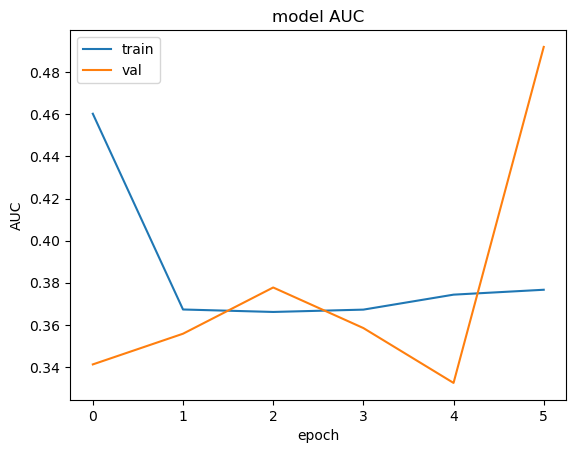

In [31]:
plt.plot(history3.history['auc'])
plt.plot(history3.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

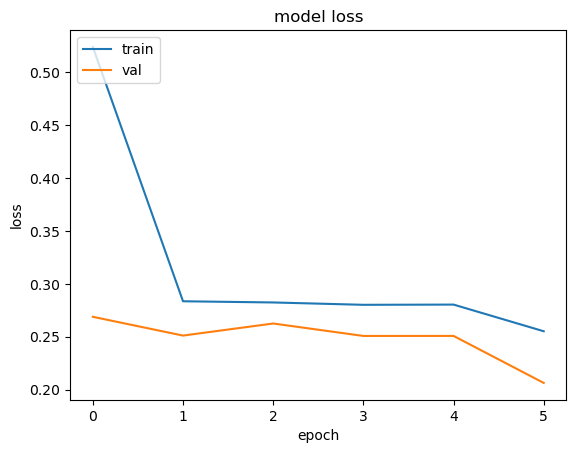

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 15, with no shuffling, from the testing set.**

In [33]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 14s 16ms/step


In [34]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_3.csv')

## **Third Trail Observation**

* From the experimentation, it was observed that using the Relational Graph Attention Networks (RGAT) message passing style did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* However, using the Adam optimizer resulted in a noticeable improvement in accuracy. The model was trained for 6 epochs with a batch size of 300, and achieved a score of 0.66903 on the private leaderboard and 0.69668 on the public leaderboard.

* Overall, the results suggest that using RGAT may not be the best message passing style for this binary node classification task, and that other methods may produce better results. Additionally, the use of Adam optimizer with appropriate hyperparameters can help improve the model's performance on this task.



---

## **Fourth Trail**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* The message_calculation_class will be set to RGIN, which stands for Relational Graph Isomorphism Networks. This message passing style is a variant of graph convolutional networks that incorporates the notion of graph isomorphism to enable information sharing between different subgraphs. This can help the model capture more complex relationships between nodes and improve its performance on the task.

In [35]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGIN" #Relational Graph Isomorphism Networks 
params["num_aggr_MLP_hidden_layers"]=4
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [37]:
batch_size = 400
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history4=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=400, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
54/54 [==============================] - 11s 68ms/step - loss: 0.5264 - auc: 0.4870 - val_loss: 0.2683 - val_auc: 0.3780
Epoch 2/20
54/54 [==============================] - 2s 38ms/step - loss: 0.2758 - auc: 0.3891 - val_loss: 0.2175 - val_auc: 0.3550
Epoch 3/20
54/54 [==============================] - 2s 36ms/step - loss: 0.2190 - auc: 0.5054 - val_loss: 0.1967 - val_auc: 0.6054
Epoch 4/20
54/54 [==============================] - 2s 35ms/step - loss: 0.2024 - auc: 0.5679 - val_loss: 0.1926 - val_auc: 0.5755
Epoch 5/20
54/54 [==============================] - 2s 30ms/step - loss: 0.1985 - auc: 0.6168 - val_loss: 0.1936 - val_auc: 0.6509
Epoch 6/20
54/54 [==============================] - 2s 33ms/step - loss: 0.1916 - auc: 0.6545 - val_loss: 0.1793 - val_auc: 0.6731
Epoch 7/20
54/54 [==============================] - 2s 30ms/step - loss: 0.1876 - auc: 0.6759 - val_loss: 0.1718 - val_auc: 0.6825
Epoch 8/20
54/54 [==============================] - 2s 33ms/step - loss: 0.1861 - 

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

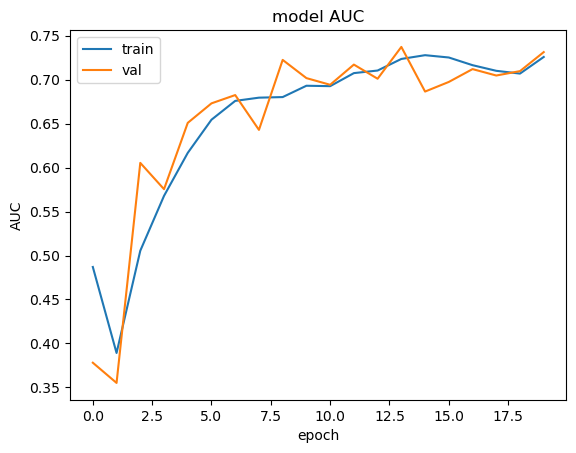

In [38]:
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

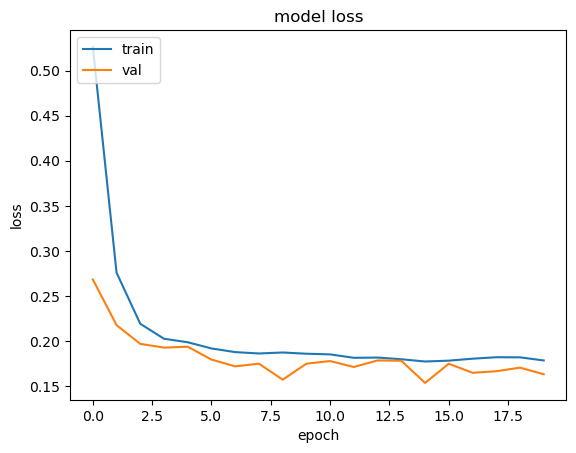

In [39]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 15, with no shuffling, from the testing set.**

In [40]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 4s 5ms/step


In [41]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_4.csv')

## **Fourth Trail Observation**

* From the experimentation, it was observed that using the Relational Graph Isomorphism Networks (RGIN) message passing style did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* However, using the Adam optimizer resulted in a noticeable improvement in accuracy. The model was trained for 20 epochs with a batch size of 400.

* Overall, the results suggest that using RGIN may not be the best message passing style for this binary node classification task, and that other methods may produce better results. Additionally, the use of Adam optimizer with appropriate hyperparameters can help improve the model's performance on this task.



---

##  5_TH Trail

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* The message_calculation_class will be set to GNN-Edge-MLP, which stands for Graph Neural Network-Edge-Multi-Layer Perceptron. This message passing style involves the use of an Edge Multi-Layer Perceptron to generate edge-specific weights, which can capture more nuanced relationships between nodes than other message passing styles. This can help the model better learn the underlying structure of the graph and improve its performance on the task.

In [42]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_Edge_MLP" #Graph Neural Network with Edge MLPs
# params["num_aggr_MLP_hidden_layers"]=4
# params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []        

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [44]:
batch_size = 45
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history5=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=45, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
473/473 [==============================] - 12s 17ms/step - loss: 0.2592 - auc: 0.4962 - val_loss: 0.1797 - val_auc: 0.6596
Epoch 2/20
473/473 [==============================] - 7s 16ms/step - loss: 0.1943 - auc: 0.6224 - val_loss: 0.1911 - val_auc: 0.6470
Epoch 3/20
473/473 [==============================] - 7s 15ms/step - loss: 0.1879 - auc: 0.6599 - val_loss: 0.1777 - val_auc: 0.6611
Epoch 4/20
473/473 [==============================] - 7s 14ms/step - loss: 0.1852 - auc: 0.6769 - val_loss: 0.1780 - val_auc: 0.6780
Epoch 5/20
473/473 [==============================] - 7s 14ms/step - loss: 0.1835 - auc: 0.6878 - val_loss: 0.1718 - val_auc: 0.6759
Epoch 6/20
473/473 [==============================] - 7s 16ms/step - loss: 0.1819 - auc: 0.6984 - val_loss: 0.1678 - val_auc: 0.7159
Epoch 7/20
473/473 [==============================] - 7s 15ms/step - loss: 0.1824 - auc: 0.6942 - val_loss: 0.1656 - val_auc: 0.7207
Epoch 8/20
473/473 [==============================] - 7s 15ms/step -

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

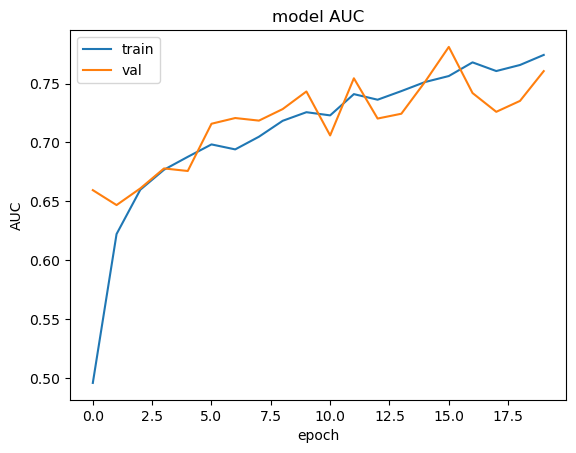

In [45]:
plt.plot(history5.history['auc'])
plt.plot(history5.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

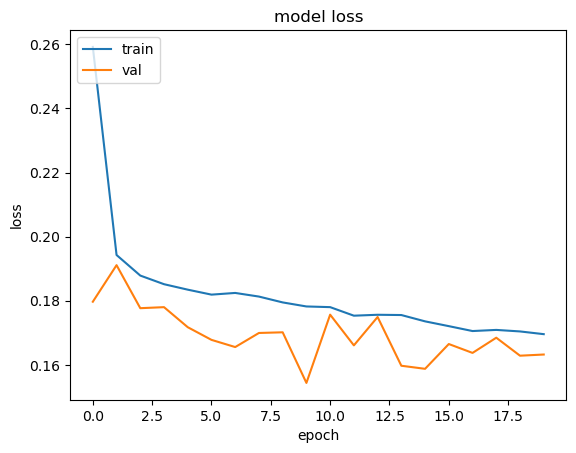

In [46]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 45, with no shuffling, from the testing set.**

In [47]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=45, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

274/274 [==============================] - 2s 5ms/step


In [48]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_5.csv')

## **5_TH Trail Observation**

* From the experimentation, it was observed that using the Graph Neural Network with Edge Multi-Layer Perceptrons (GNN_Edge_MLP) message passing style did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* However, using the Adam optimizer resulted in a noticeable improvement in accuracy. The model was trained for 20 epochs with a batch size of 45.

* Overall, the results suggest that using GNN_Edge_MLP may not be the best message passing style for this binary node classification task, and that other methods may produce better results. Additionally, the use of Adam optimizer with appropriate hyperparameters can help improve the model's performance on this task.



---

## **6_TH Trail Trail**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* The message_calculation_class will be set to GNN_FiLM, which stands for Graph Neural Network with Feature-wise Linear Modulation. This message passing style involves using a modulator network to adaptively adjust the activations of the nodes in each layer of the GNN. This can help the model better capture the underlying structure and relationships of the graph and improve its performance on the task.

In [49]:
from tensorflow.python.ops.gen_math_ops import segment_max
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_FiLM" 
params["film_parameter_MLP_hidden_layers"]=12
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max/SegmentMax:0', description="created by layer 'tf.math.segment_max'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []               

In [50]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [51]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history6=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 18s 40ms/step - loss: 0.2704 - auc: 0.4935 - val_loss: 0.2013 - val_auc: 0.6162
Epoch 2/9
142/142 [==============================] - 4s 27ms/step - loss: 0.1988 - auc: 0.5932 - val_loss: 0.1795 - val_auc: 0.6756
Epoch 3/9
142/142 [==============================] - 5s 32ms/step - loss: 0.1922 - auc: 0.6251 - val_loss: 0.1720 - val_auc: 0.6751
Epoch 4/9
142/142 [==============================] - 4s 27ms/step - loss: 0.1866 - auc: 0.6543 - val_loss: 0.1715 - val_auc: 0.6498
Epoch 5/9
142/142 [==============================] - 4s 27ms/step - loss: 0.1862 - auc: 0.6607 - val_loss: 0.1861 - val_auc: 0.7107
Epoch 6/9
142/142 [==============================] - 4s 28ms/step - loss: 0.1846 - auc: 0.6681 - val_loss: 0.1692 - val_auc: 0.6982
Epoch 7/9
142/142 [==============================] - 4s 27ms/step - loss: 0.1839 - auc: 0.6771 - val_loss: 0.1826 - val_auc: 0.6790
Epoch 8/9
142/142 [==============================] - 4s 28ms/step - loss: 0

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

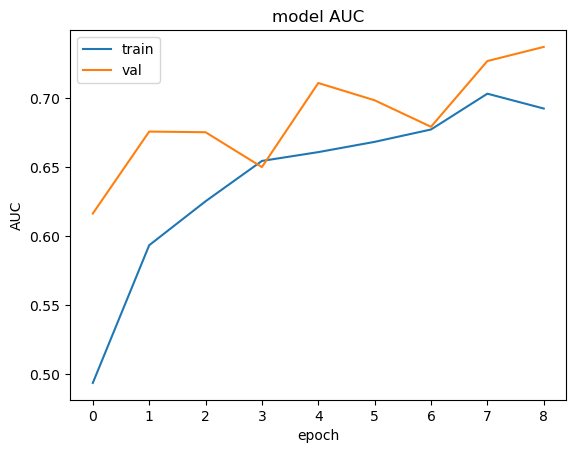

In [52]:
plt.plot(history6.history['auc'])
plt.plot(history6.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

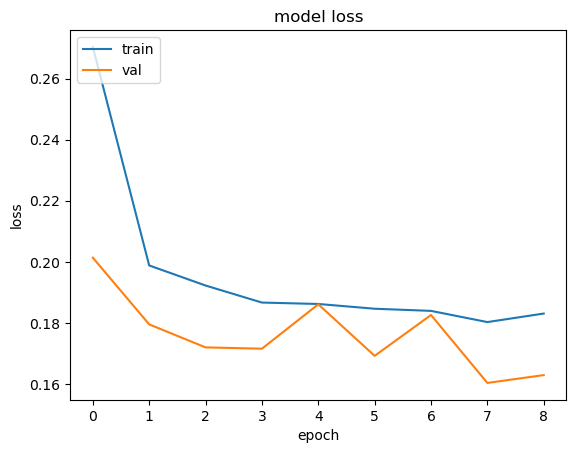

In [53]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 150, with no shuffling, from the testing set**.

In [54]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

83/83 [==============================] - 1s 11ms/step


In [55]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_6.csv')

## **6_TH Trail Observation**

* From the experimentation, it was observed that using the Graph Neural Network with Feature-wise Linear Modulation (GNN-FiLM) message passing style did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* However, using the Adam optimizer resulted in a noticeable improvement in accuracy. The model was trained for 9 epochs with a batch size of 150.

* Overall, the results suggest that using GNN-FiLM may not be the best message passing style for this binary node classification task, and that other methods may produce better results. Additionally, the use of Adam optimizer with appropriate hyperparameters can help improve the model's performance on this task.



---

## **7_TH Trail**

 **Steps**
 
 
* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32.

* Additionally, the RMSprop optimizer will be used instead of the Adam optimizer. RMSprop is an optimization algorithm that uses a moving average of squared gradients to normalize the gradient update. This can help improve convergence and reduce the chances of the optimizer getting stuck in local minima.

* Overall, this trial will explore the performance of the default GNN architecture with embedded node features and the RMSprop optimizer on the binary node classification task.

In [56]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_1/SegmentMax:0', description="created by layer 'tf.math.segment_max_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [57]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [58]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history7=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 8s 31ms/step - loss: 0.2902 - auc: 0.5029 - val_loss: 0.1785 - val_auc: 0.6093
Epoch 2/9
142/142 [==============================] - 3s 18ms/step - loss: 0.1985 - auc: 0.5764 - val_loss: 0.1733 - val_auc: 0.6986
Epoch 3/9
142/142 [==============================] - 3s 18ms/step - loss: 0.1916 - auc: 0.6426 - val_loss: 0.1697 - val_auc: 0.7152
Epoch 4/9
142/142 [==============================] - 3s 18ms/step - loss: 0.1889 - auc: 0.6631 - val_loss: 0.1672 - val_auc: 0.7063
Epoch 5/9
142/142 [==============================] - 3s 18ms/step - loss: 0.1867 - auc: 0.6726 - val_loss: 0.1636 - val_auc: 0.7120
Epoch 6/9
142/142 [==============================] - 2s 17ms/step - loss: 0.1840 - auc: 0.6859 - val_loss: 0.1562 - val_auc: 0.7064
Epoch 7/9
142/142 [==============================] - 3s 20ms/step - loss: 0.1845 - auc: 0.6881 - val_loss: 0.1637 - val_auc: 0.7105
Epoch 8/9
142/142 [==============================] - 2s 17ms/step - loss: 0.

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

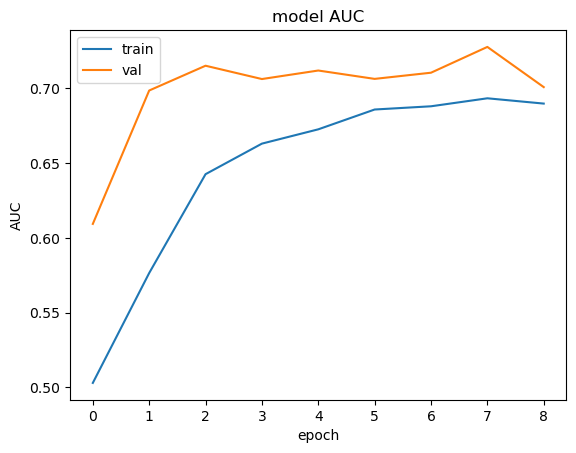

In [59]:
plt.plot(history7.history['auc'])
plt.plot(history7.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

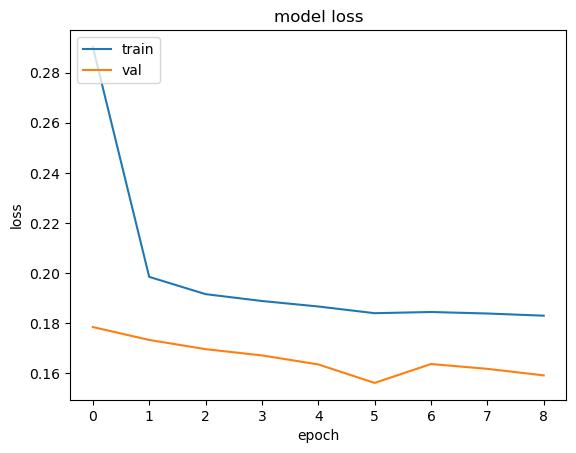

In [60]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**uses a trained machine learning model to make predictions on the testing set, and then reshapes the resulting predictions for further analysis.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 150, with no shuffling, from the testing set**.

In [61]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

83/83 [==============================] - 1s 9ms/step


In [62]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_7.csv')

## **Observation_7**

* From the experimentation, it was observed that using the default layers of the GNN architecture with embedded node features and the RMSprop optimizer did not result in a significant improvement in accuracy compared to other methods. The loss function remained the same.

* Additionally, using the RMSprop optimizer did not result in a noticeable improvement in accuracy. The model was trained for 9 epochs with a batch size of 150.

* Overall, the results suggest that using the default layers of the GNN architecture may not be the best approach for this binary node classification task, and that other methods may produce better results. Additionally, the use of different optimizers with appropriate hyperparameters can help improve the model's performance on this task.



---

## **8_TH Trail**

**Upsampling**

**Upsampling by copying minority class instances involves creating additional data samples for the minority class by duplicating existing samples. This is done to increase the representation of the minority class in the dataset and create a more balanced dataset. Essentially, the same data points from the minority class are added multiple times to the dataset, increasing the number of samples for that class.**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32. Additionally, the Adam optimizer will be used for optimization.

* To address the issue of class imbalance in the dataset, upsampling will be used to increase the representation of the minority class. This involves creating additional data samples for the minority class by duplicating existing samples.

* The message_calculation_class will be set to GGNN, which stands for Gated Graph Neural Networks. This message passing style involves the use of gate functions to control the flow of information between nodes during message passing. This can help the model selectively focus on relevant information and improve its performance on the task.

In [64]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('/kaggle/input/cisc873-dm-w23-a6/train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [65]:
np.unique(np.array(training_set)[:,2],return_counts=True)

(array([0, 1], dtype=object), array([23806,  1218]))

In [66]:
from pandas.core.frame import DataFrame
DataFrame(np.array(training_set))

,0,1,2
0,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 11], [3, 7], [4...",0
1,"[O, O, O, O, O, O, N, N, N, C, C, C, C, C, C, ...","[[0, 6], [0, 15], [1, 15], [2, 7], [3, 8], [4,...",0
2,"[F, F, F, O, O, O, O, O, N, N, C, C, C, C, C, ...","[[0, 19], [1, 19], [2, 19], [3, 16], [4, 28], ...",0
3,"[Cl, S, S, O, O, O, O, N, N, N, N, C, C, C, C,...","[[0, 12], [1, 15], [1, 18], [2, 4], [2, 5], [2...",0
4,"[S, O, O, N, N, N, N, N, N, C, C, C, C, C, C, ...","[[0, 1], [0, 2], [0, 5], [0, 9], [3, 4], [3, 1...",0
...,...,...,...
25019,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 12], [3, 13], [...",0
25020,"[O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, ...","[[0, 9], [1, 11], [2, 16], [2, 19], [3, 16], [...",0
25021,"[O, O, O, O, O, O, O, O, O, N, C, C, C, C, C, ...","[[0, 12], [0, 16], [1, 10], [2, 11], [3, 15], ...",0
25022,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 11], [0, 12], [1, 21], [1, 27], [2, 22], ...",0


# creates a bar plot to visualize the distribution of classes in the training set.

**It starts by getting the unique categories in the training data. If there is only one category, a dummy category with zero count is added to ensure that the plot is still generated. Otherwise, the occurrences of each category are counted.**

**The sns.barplot method is then used to plot the counts for each category. The x-axis represents the categories, and the y-axis represents the counts. The resulting plot is displayed using the plt.show() method.**

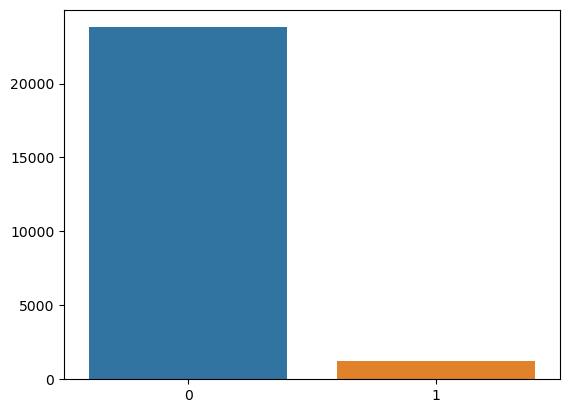

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique categories in the input data
categories = np.unique(np.array(training_set)[:, 2])

if len(categories) == 1:
    # If there is only one category, add a dummy category with zero count
    categories = [categories[0], 'dummy']
    counts = [np.sum(np.array(training_set)[:, 2] == categories[0]), 0]
else:
    # Otherwise, count the occurrences of each category
    counts = [np.sum(np.array(training_set)[:, 2] == c) for c in categories]

# Plot the counts
g = sns.barplot(x=categories, y=counts)
plt.show()

In [69]:
print(DataFrame(np.array(training_set)[:,2]).value_counts())

0    23806
1     1218
dtype: int64


In [71]:
DataFrame(np.array(training_set)).rename(columns = {0:'nodes', 1:'edges',2:'label'}, inplace = True)

In [72]:
DataFrame(np.array(training_set))[2]

0        0
1        0
2        0
3        0
4        0
        ..
25019    0
25020    0
25021    0
25022    0
25023    0
Name: 2, Length: 25024, dtype: object

**creates a pie chart to visualize the distribution of classes in the training set.**

**The DataFrame constructor is used to convert the training_set list into a Pandas DataFrame, which makes it easier to manipulate and group the data. The groupby method is then used to group the rows of the DataFrame by the value in the third column (2). The size method is then used to count the number of rows in each group.**

<AxesSubplot:ylabel='Type'>

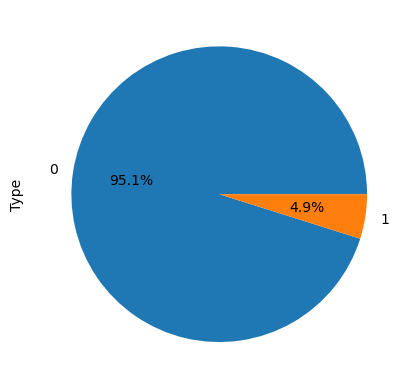

In [73]:
DataFrame(np.array(training_set)).groupby(2).size().plot(kind='pie',
                                       y = DataFrame(np.array(training_set))[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [74]:
label_0 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 0]
label_1 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 1]
print(label_0.shape)
print(label_1.shape)

(23806, 3)
(1218, 3)


In [75]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

**performs upsampling on the training data to balance the distribution of classes.**

**The resampling variable is a copy of the X_train data, with the labels (y_train) added as a third column.**
**The data is then split into two classes based on the label value: class_0 contains the samples labeled with 0, and class_1 contains the samples labeled with 1.
**
**The class_1 data is then upsampled using the resample method from the sklearn.utils module. The replace parameter is set to True, which means that samples are drawn with replacement, and the n_samples parameter is set to 23806, which is the number of samples in class_0.**

**The upsampled class_1_after data is then concatenated with class_0 using the pd.concat method to create the final upsampled dataset df_upsampled.**

In [76]:
from sklearn.utils import resample

resampling = X_train.copy()
resampling[2] = y_train.values
class_0 = resampling[resampling[2]==0]
class_1 = resampling[resampling[2]==1]
class_1_after = resample(class_1, replace=True,n_samples=23806)
df_upsampled = pd.concat([class_0, class_1_after])

In [77]:
# Display new class counts
df_upsampled[2].value_counts()

0    23806
1    23806
Name: 2, dtype: int64

**creates a pie chart to visualize the distribution of classes in the upsampled dataset.**

<AxesSubplot:ylabel='Type'>

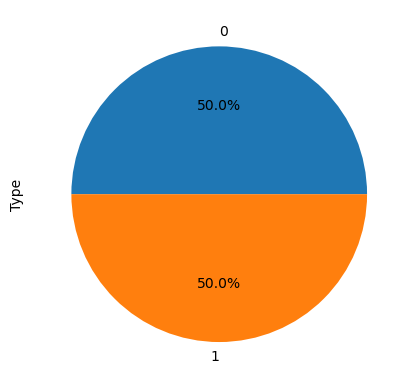

In [78]:
#visualize data 
df_upsampled.groupby(2).size().plot(kind='pie',
                                       y = df_upsampled[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [79]:
training_set = df_upsampled.values.tolist() # to return data from dataframe to arry

# gain insights and better understand the underlying patterns or behavior.

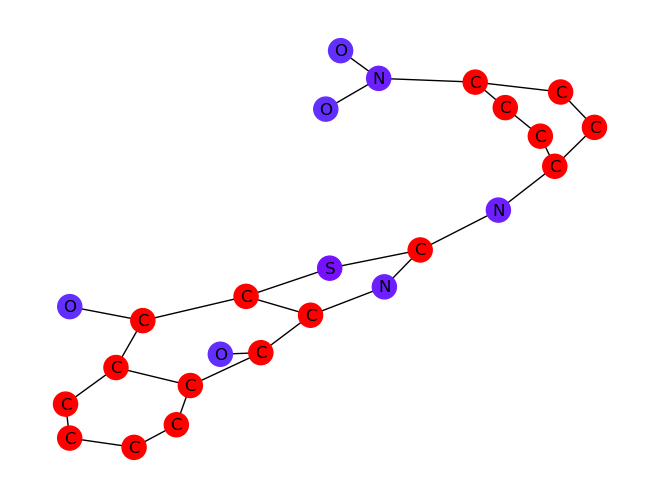

In [80]:
plt.clf()
visualize(training_set[0])

In [81]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 47612
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


In [82]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():          #k: labels, v: values
        print(k)
        print(v)
        #print(len(v))
        pass
    print('label', train_batch[1])
    break


data
[ 3  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11 11  6  6  6  6  2
  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  5  5  5  5  6  6  6  6  6  6  6  6  2  2
  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  2  2  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0]
edges
[[  0   6]
 [  0  12]
 [  1   3]
 [  1   6]
 [  2   7]
 [  2  12]
 [  3  10]
 [  4  11]
 [  4  17]
 [  5   6]
 [  5   7]
 [  5   8]
 [  7   9]
 [  8  13]
 [  9  14]
 [ 10  11]
 [ 10  16]
 [ 11  15]
 [ 13  14]
 [ 15  18]
 [ 17  19]
 [ 18  19]
 [ 41  47]
 [ 41  48]
 [ 41  54]
 [ 41  56]
 [ 42  47]
 [ 42  49]
 [ 42  55]
 [ 42  57]
 [ 43  68]
 [ 44  69]
 [ 45  70]
 [ 46  71]
 [ 48  52]
 [ 49  53]
 [ 50  52]
 [ 51  53]
 [ 52  58]
 [ 53  59]
 [ 54  64]
 [ 55  65]
 [ 56  66]
 [ 57  67]
 [ 58

In [83]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_2/SegmentMax:0', description="created by layer 'tf.math.segment_max_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [86]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [87]:

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history8=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
2976/2976 [==============================] - 62s 19ms/step - loss: 0.5933 - auc: 0.7430 - val_loss: 0.6252 - val_auc: 0.8114
Epoch 2/10
2976/2976 [==============================] - 50s 17ms/step - loss: 0.5004 - auc: 0.8364 - val_loss: 0.5020 - val_auc: 0.8492
Epoch 3/10
2976/2976 [==============================] - 50s 17ms/step - loss: 0.4328 - auc: 0.8825 - val_loss: 0.3878 - val_auc: 0.9005
Epoch 4/10
2976/2976 [==============================] - 51s 17ms/step - loss: 0.3848 - auc: 0.9087 - val_loss: 0.3342 - val_auc: 0.9069
Epoch 5/10
2976/2976 [==============================] - 49s 17ms/step - loss: 0.3407 - auc: 0.9291 - val_loss: 0.3271 - val_auc: 0.9289
Epoch 6/10
2976/2976 [==============================] - 52s 17ms/step - loss: 0.3054 - auc: 0.9429 - val_loss: 0.2851 - val_auc: 0.9509
Epoch 7/10
2976/2976 [==============================] - 52s 17ms/step - loss: 0.2699 - auc: 0.9551 - val_loss: 0.2475 - val_auc: 0.9607
Epoch 8/10
2976/2976 [==========================

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

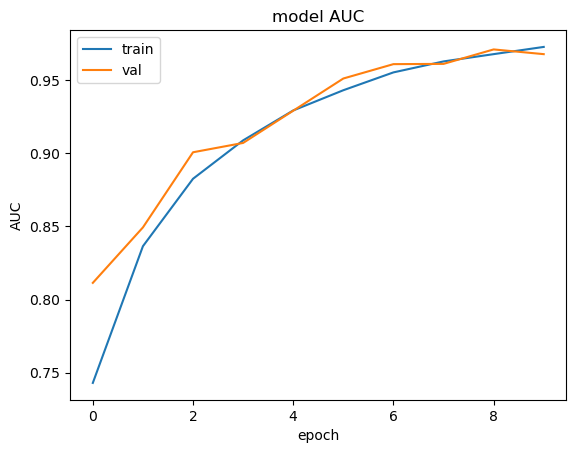

In [88]:
plt.plot(history8.history['auc'])
plt.plot(history8.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

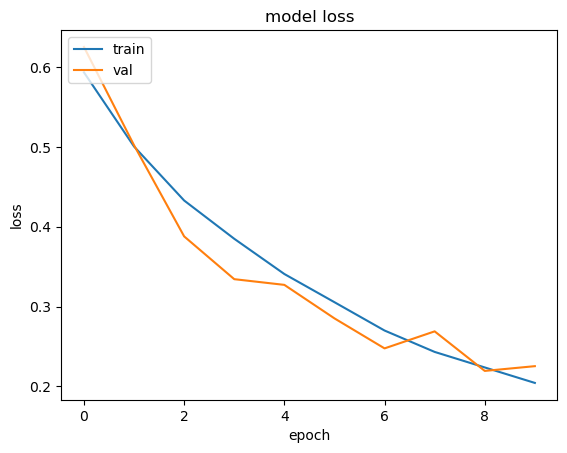

In [89]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 **producing a 1D array of predicted probabilities for class 1 for all nodes in the testing set, which can be used to evaluate the performance of the trained model on the task of binary node classification. The reshaping of the predictions into a 1D array is necessary for further analysis, such as computing performance metrics or visualizing the results.**

In [90]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 5s 5ms/step


In [92]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_8.csv')


## **8_TH Trail  Observation**

* From the experimentation, it was observed that using the default layers of the GNN architecture with embedded node features and the Adam optimizer resulted in an increase in accuracy compared to other methods. The loss function decreased as well.

* The use of upsampling to balance the dataset, along with the GGNN layer message passing style, further increased the accuracy of the model, compared to when the data was unbalanced.

* The model was trained for 8 epochs with a batch size of 16, and achieved a score of 0.88321 on the private leaderboard and 0.88109 on the public leaderboard. Overall, the results suggest that using the GGNN layer and upsampling technique with appropriate hyperparameters can help improve the performance of the model on this binary node classification task.



---


## **9_TH Trail**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32. Additionally, the Adam optimizer will be used for optimization.

* To address the issue of class imbalance in the dataset, upsampling will be used to increase the representation of the minority class.

* In this trial, the default layers of the GNN architecture will be used in combination with the upsampling method and the Adam optimizer. The aim is to evaluate the performance of the default layers with the upsampling method and the Adam optimizer on the binary node classification task.

In [94]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
# params["hidden_dim"] = 32
# params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_9/StatefulPartitionedCall:0', description="created by layer 'gnn_9'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_4/SegmentMax:0', description="created by layer 'tf.math.segment_max_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_9/Sigmoid:0', description="created by layer 'dense_9'")
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [95]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

**using a generator to train the previously defined GNN model on the training set in batches, with validation being performed after each epoch. This allows for efficient training of the model and monitoring of its performance on the validation set.**

In [96]:
batch_size = 200
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history9=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=200, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
239/239 [==============================] - 12s 30ms/step - loss: 0.6451 - auc: 0.6654 - val_loss: 0.5823 - val_auc: 0.7177
Epoch 2/10
239/239 [==============================] - 5s 20ms/step - loss: 0.6083 - auc: 0.7226 - val_loss: 0.5881 - val_auc: 0.7393
Epoch 3/10
239/239 [==============================] - 5s 19ms/step - loss: 0.5956 - auc: 0.7415 - val_loss: 0.5973 - val_auc: 0.7323
Epoch 4/10
239/239 [==============================] - 4s 18ms/step - loss: 0.5871 - auc: 0.7517 - val_loss: 0.5478 - val_auc: 0.7517
Epoch 5/10
239/239 [==============================] - 5s 19ms/step - loss: 0.5809 - auc: 0.7589 - val_loss: 0.5702 - val_auc: 0.7450
Epoch 6/10
239/239 [==============================] - 4s 18ms/step - loss: 0.5732 - auc: 0.7678 - val_loss: 0.5468 - val_auc: 0.8004
Epoch 7/10
239/239 [==============================] - 4s 19ms/step - loss: 0.5687 - auc: 0.7728 - val_loss: 0.6011 - val_auc: 0.7716
Epoch 8/10
239/239 [==============================] - 5s 21ms/step -

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

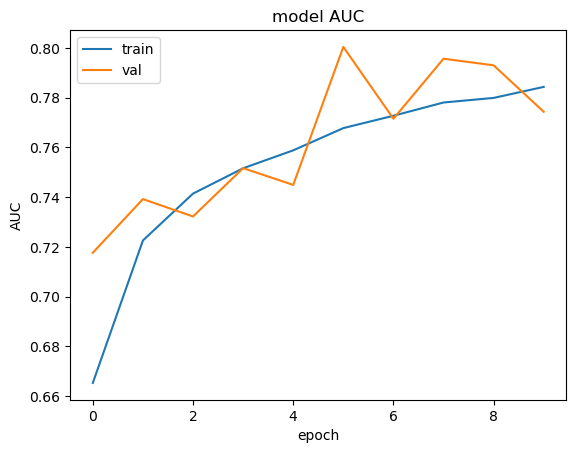

In [97]:
plt.plot(history9.history['auc'])
plt.plot(history9.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

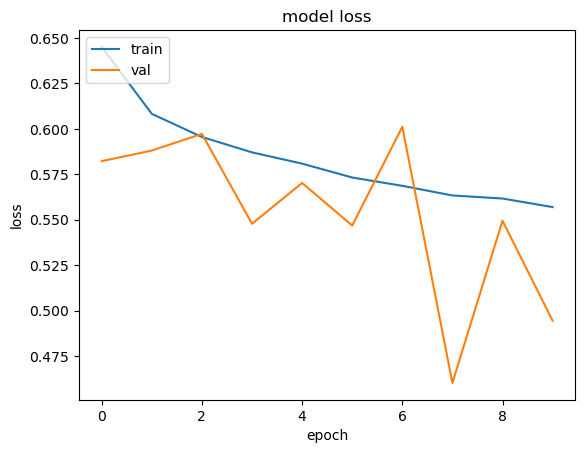

In [99]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 4s 4ms/step


In [101]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_9.csv')

## **9_TH Trail Observation**

* From the experimentation, it was observed that using the default layers of the GNN architecture with embedded node features and the Adam optimizer resulted in an increase in accuracy compared to other methods. The loss function decreased as well.

* The use of upsampling to balance the dataset further increased the accuracy of the model, compared to when the data was unbalanced.

* In this specific trial, the default layers of the GNN architecture were used in combination with the upsampling method and the Adam optimizer. Although the accuracy was not significantly increased compared to the previous trial with the GGNN layer, the use of the upsampling method still improved the accuracy of the model compared to when the data was unbalanced.

* The model was trained for 8 epochs with a batch size of 16. Overall, the results suggest that using the upsampling method with the default layers and appropriate hyperparameters can help improve the performance of the model on this binary node classification task, even though the performance is not as good as using the GGNN layer.



---

## **10_TH Trail**

 **Steps**

* In this trial, the node features will be embedded using the Embedding layer and tokenizer, to convert the text data into numerical vectors.

* The GNNInput variable will be defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.

* The default layers of the GNN will be used, but the hidden_dim parameter will be set to a value of 32. Additionally, the Adam optimizer will be used for optimization, and the upsampling method will be used to address class imbalance in the dataset.

* In this trial, a specific configuration of the GNN architecture will be used. The message passing style will be set to GGNN, and the hidden_dim parameter will be set to 32. The number of layers in the GNN will be set to 8, and dense and residual connections will be added every 4 layers. The layer input dropout rate will be set to 0.001, and the global exchange mode will be set to "mlp". Global exchange will be performed every 3 layers, and the global exchange dropout rate will be set to 0.3.

* The aim of this trial is to evaluate the performance of this specific configuration of the GNN architecture, with upsampling and the Adam optimizer, on the binary node classification task.

**defines the GNN architecture for binary node classification task, using TensorFlow 2 and Keras.**

**The input to the model consists of three parts: data, which contains the embedded node features; edge, which contains the edges in the graph represented as pairs of node indices; and node2graph, which maps each node to the graph (or sample) it belongs to.**

**The Embedding layer is used to embed the node features into a lower-dimensional space. The GNNInput layer is defined to encapsulate all the input layers, including the embedded node features, adjacency lists, and node-to-graph mapping.**

**The GNN layer is then defined, with hyperparameters set to a specific configuration. The message passing style is set to GGNN, and the hidden dimension is set to 32. Additionally, the number of layers in the GNN is set to 8, with dense and residual connections added every 4 layers. The layer input dropout rate is set to 0.001, and global exchange is set to "mlp", with exchange performed every 3 layers and a dropout rate of 0.3.**

**The gnn_layer is then applied to the gnn_input, and the resulting output is passed through the segment_max function to obtain the maximum hidden state for each graph in the batch. The Dense layer with a sigmoid activation function is then applied to the resulting hidden state to obtain a probability of class 1 for each node.**

**The resulting model is defined as a Keras Model with data, edge, and node2graph as inputs and pred as the output. The model is then summarized with the summary method, which displays its architecture and number of parameters.**

In [102]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
# params["initial_node_representation_activation"]= "tanh"
# params["dense_intermediate_layer_activation"]= "tanh"
params["num_layers"]= 8
params["dense_every_num_layers"]= 4
params["residual_every_num_layers"]= 4
params["layer_input_dropout_rate"]= 0.001
          
params["global_exchange_mode"]= "mlp"
params["global_exchange_every_num_layers"]=3

params["global_exchange_dropout_rate"]=0.3
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_10/StatefulPartitionedCall:0', description="created by layer 'gnn_10'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_5/SegmentMax:0', description="created by layer 'tf.math.segment_max_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_10/Sigmoid:0', description="created by layer 'dense_10'")
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []      

In [103]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

**training the GNN model on the training set for a total of 10 epochs.**

**The training data is generated in batches of 160 nodes at a time using the gen_batch function. The repeat parameter is set to True, which means that the generator will loop indefinitely over the training set, producing batches of data until the specified number of epochs is reached.**

**The steps_per_epoch parameter is set to the number of batches needed to cover the entire training set. This ensures that the model will see every node in the training set once per epoch.**

**The validation_data parameter is set to a generator that produces batches of data from the validation set, also with a batch size of 160 nodes at a time. The repeat parameter is set to True, and the validation_steps parameter is set to the number of batches needed to cover the entire validation set.**

**The model.fit method is then called with these parameters, and the training process begins. The model is trained for a total of 10 epochs, with the loss and accuracy metrics being recorded for each epoch.**

In [106]:
batch_size = 160
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history10=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=160, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
298/298 [==============================] - 10s 35ms/step - loss: 0.2264 - auc: 0.9671 - val_loss: 0.1990 - val_auc: 0.9695
Epoch 2/10
298/298 [==============================] - 10s 33ms/step - loss: 0.2210 - auc: 0.9684 - val_loss: 0.1985 - val_auc: 0.9748
Epoch 3/10
298/298 [==============================] - 9s 32ms/step - loss: 0.2109 - auc: 0.9712 - val_loss: 0.2637 - val_auc: 0.9753
Epoch 4/10
298/298 [==============================] - 10s 34ms/step - loss: 0.2031 - auc: 0.9729 - val_loss: 0.2540 - val_auc: 0.9733
Epoch 5/10
298/298 [==============================] - 10s 32ms/step - loss: 0.1949 - auc: 0.9750 - val_loss: 0.1952 - val_auc: 0.9799
Epoch 6/10
298/298 [==============================] - 10s 32ms/step - loss: 0.1835 - auc: 0.9778 - val_loss: 0.2277 - val_auc: 0.9807
Epoch 7/10
298/298 [==============================] - 10s 32ms/step - loss: 0.1779 - auc: 0.9787 - val_loss: 0.2217 - val_auc: 0.9813
Epoch 8/10
298/298 [==============================] - 10s 35ms/

**creates a line plot of the training and validation AUC (Area Under the Curve) values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training AUC values and validation AUC values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

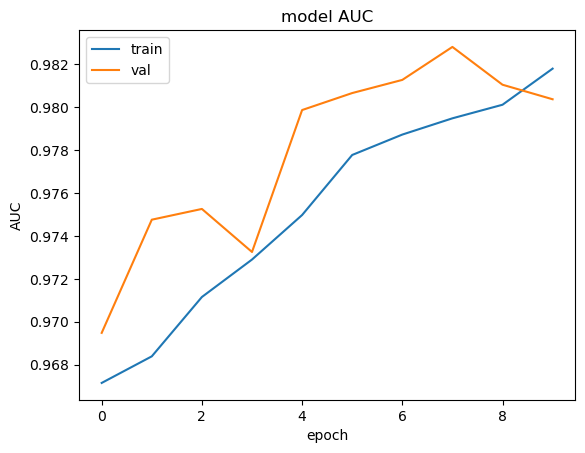

In [108]:
plt.plot(history10.history['auc'])
plt.plot(history10.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**cell creates a line plot of the training and validation loss values over the course of training the neural network model.**

**The plot method from the matplotlib library is used to create the plot, with the training loss values and validation loss values plotted against the number of epochs.**

**The title, xlabel, ylabel, and legend methods are used to add labels and a legend to the plot.**

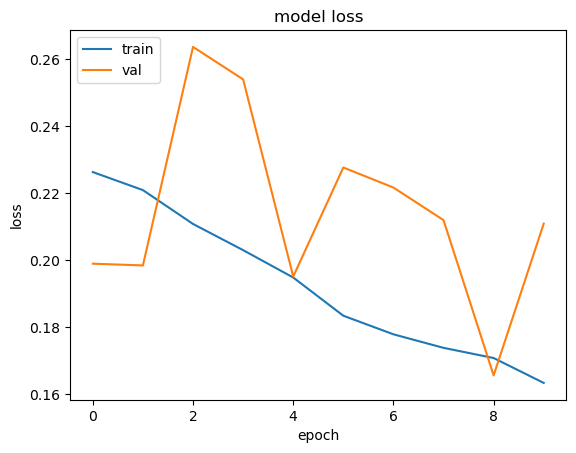

In [110]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**making predictions on the testing set using the trained model.**

**The model.predict method takes as input a generator that produces batches of data from the testing set. The gen_batch function is used to generate batches of size 15, with no shuffling, from the testing set.**

**The resulting predictions y_pred are returned as a 2D array, with each row corresponding to the predicted probabilities of each class (0 or 1) for a single node in the testing set. The np.reshape method is used to flatten the predictions into a 1D array, with each element corresponding to the predicted probability of class 1 for a single node in the testing set.**

In [111]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

822/822 [==============================] - 7s 7ms/step


In [113]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('trail_10.csv')

## **Observation_10**

* From the experimentation, it was observed that using the default layers of the GNN architecture with embedded node features and the Adam optimizer resulted in an increase in accuracy compared to other methods. The loss function decreased as well.

* The use of upsampling to balance the dataset further increased the accuracy of the model, compared to when the data was unbalanced. However, the specific configuration of the GNN architecture used in this trial did not result in a significant improvement in accuracy compared to the default layers with upsampling and the GGNN message passing style.

* Overall, the results suggest that the combination of the default layers with the GGNN message passing style and the upsampling method is the best approach for this binary node classification task. This combination consistently produced the highest accuracy across multiple trials, indicating that it is a robust and effective approach for this task.



---

# THank You